In [6]:
%cd '/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect'

/mnt/c/Users/malin/Documents/Facultate/honours/UMCG/ICU_Augment_and_Detect


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import skimage
from augment.face_org import exportImage

In [8]:

def average_blur(img, size):
    kernel = np.ones((size,size),np.float32)/(size*size)
    blurred = cv2.filter2D(img,-1,kernel)
    return blurred

def gaussian_blur(img, size):
    return cv2.GaussianBlur(img,(size,size),0)

def median_filtering(img, size):
    return cv2.medianBlur(img, size)

def bilateral_filtering(img, size):
    return cv2.bilateralFilter(img,size,75,75)

def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return img

def adjust_gamma(image, gamma):
   invGamma = 1.0 / gamma
   table = np.array([
      ((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)])
   return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))


def noise(img, mode):
    return skimage.util.random_noise(img, mode=mode)

def plotimage(img, title, r, c, i):
    plt.figure(figsize=(15,15))
    plt.subplot(r,c,i)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")


def plot_all(img):
    # noise_types = ["gaussian", "localvar", "poisson", "speckle"]
    noise_names = {"gaussian":"Gaussian Noise", "localvar":"Localvar Noise", "poisson":"Poisson Noise", "speckle":"Speckle Noise"}
    noise_types = ["gaussian", "localvar"]
    gamma_vals = [0.75, 1.50]
    blur = [5]
    plt.figure(figsize=(10,10))
    r = 2
    c = 3
    i = 0
    # plotimage(img, "Original", r,c,i)
    for gamma in gamma_vals:
        i += 1
        gamma = gamma if gamma > 0 else 0.5
        adjusted = adjust_gamma(img, gamma=gamma)
        plotimage(adjusted, "Brightness gamma = " + str(gamma), r,c,i)
    for n in noise_types:
        i +=1
        noisy = noise(img, n)
        plotimage(noisy, noise_names[n], r,c,i)
    for size in blur:
        i += 1
        blurred = gaussian_blur(img, size)
        plotimage(blurred, "Gaussian Blur size =" + str(size), r,c,i)
    for size in blur:
        i += 1
        blurred = bilateral_filtering(img, size)
        plotimage(blurred, "Bilateral Filtering size = " + str(size), r,c,i)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0)
    # plt.suptitle("Methods of Image Augmentation")
    plt.savefig("data/plots/altered_images_plot.png")
    plt.show()
    
def alter_and_save(img, filename):
    # noise_types = ["gaussian", "localvar", "poisson", "speckle"]
    # gamma_vals = [75, 125, 150]
    # blur = [3, 5]
    noise_types = ["gaussian", "localvar"]
    gamma_vals = [75, 150]
    blur = [5]
    filename = filename.split(".")[0]
    for gamma in gamma_vals:
        gamma = gamma/100
        gamma = gamma if gamma > 0 else 0.5
        adjusted = adjust_gamma(img, gamma=gamma)
        exportImage("altered_1", filename, "gamma-"+ str(gamma) + ".png", adjusted)
    for n in noise_types:
        noisy = noise(img, n)
        exportImage("altered_1", filename, "noisy-" + str(n) + ".png", noisy)
    for size in blur:
        blurred = gaussian_blur(img, size)
        exportImage("altered_1", filename, "gaussian-"+ str(size) + ".png", blurred)
    for size in blur:
        blurred = bilateral_filtering(img, size)
        exportImage("altered_1", filename, "bilateral-" + str(size) + ".png", blurred)


def flip_all(source_path):
    for f in os.listdir(source_path):
        if f.startswith('.'):
            continue
        full_path = os.path.join(source_path, f)
        if os.path.isfile(full_path) and "right" not in f and "left" not in f:
            print(f)
            img =  cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            flipped = cv2.flip(img, 1)
            exportImage("altered_1", f, "flipped" + ".png", flipped)

In [ ]:
if __name__ == "__main__":
    
    source_path = "data/parsed/sick"
    target_path = "data/parsed/altered_1"
    for f in os.listdir(source_path):
        if f.startswith('.'):
            continue
        full_path = os.path.join(source_path, f)
        if os.path.isfile(full_path):
            img =  cv2.imread(full_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            alter_and_save(img, f)
    flip_all(target_path)
    print("Finished!\n")

In [12]:
# source_path = "data/parsed/sick"
# target_path = "data/parsed/sick-brightened"
source_path = "data/parsed/healthy"
target_path = "data/parsed/healthy-brightened"
for f in os.listdir(source_path):
    if f.startswith('.'):
        continue
    full_path = os.path.join(source_path, f)
    if os.path.isfile(full_path):
        img =  cv2.imread(full_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        adjusted = adjust_gamma(img, 1.4)
        fig= plt.figure(frameon=False)
        plt.axis("off")
        imgplot = plt.imshow(adjusted)
        plt.savefig(target_path + "/" + f, bbox_inches='tight',transparent=True, pad_inches=0)
        plt.close(fig)
print("Finished!\n")

Finished!



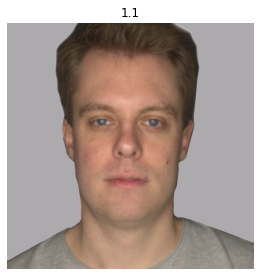

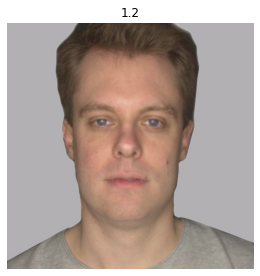

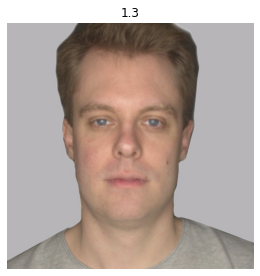

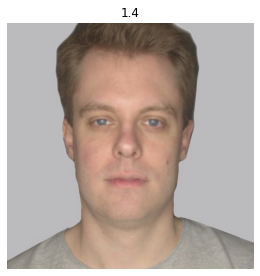

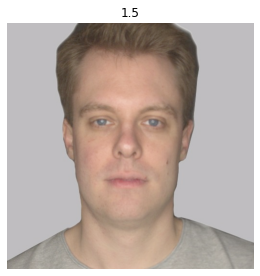

In [15]:
# full_path = "data/parsed/sick/s19s-f_face.png"
# full_path = "data/test.png"
img =  cv2.imread(full_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plot_all(img)